## Nombre: Pablo Segovia
### CEIA - Aprendizaje de Máquina 1
#### Dataset: [Credit Profile](https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset)

### Importamos librerías

In [4]:
# Importamos librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [5]:
# Importamos librerías de sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Importamos de selección de modelo
from sklearn.model_selection import train_test_split

# Importamos modelos lineales
from sklearn.linear_model import LogisticRegression, LinearRegression

# Importamos métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve, ConfusionMatrixDisplay

### Importamos funciones de cálculo

### Importamos Dataset

In [8]:
credit = pd.read_csv('credit_data.csv')

### Exploramos dataset

In [10]:
# Vemos las primeras 5 filas
credit.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [11]:
credit.shape

(279856, 15)

In [12]:
# Analizamos la información de las columnas
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [13]:
# Analizamos los valores nulos para saber si se pueden imputar
credit.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

- Vemos que la única columna con valores nulos es la de Occupation

In [15]:
# Vemos qué contiene esa columna
credit.Occupation.value_counts()

Banker                    27760
Teacher                   27356
Civil Servant             27221
Software Engineer         27146
Doctor                    26582
Shopkeeper                21405
Contractor                21090
Farmer                    20966
Business Owner            20908
Student                   18521
Graphic Designer           5723
Photographer               5706
Independent Consultant     5628
Writer                     5572
Name: Occupation, dtype: int64

- Con este valor de nulos intermedio en frecuencia a las ocupaciones, podríamos imputar los nulos como otra ocupación: `Other`.

In [17]:
# Imputamos los valores nulos como otros
credit.Occupation = credit.Occupation.fillna('Other')

In [18]:
# Ahora vemos si forma parte de la categorización
credit.Occupation.value_counts()

Banker                    27760
Teacher                   27356
Civil Servant             27221
Software Engineer         27146
Doctor                    26582
Shopkeeper                21405
Contractor                21090
Farmer                    20966
Business Owner            20908
Student                   18521
Other                     18272
Graphic Designer           5723
Photographer               5706
Independent Consultant     5628
Writer                     5572
Name: Occupation, dtype: int64

- Efectivamente vemos que están presentes.

### Separamos las variables

### Age

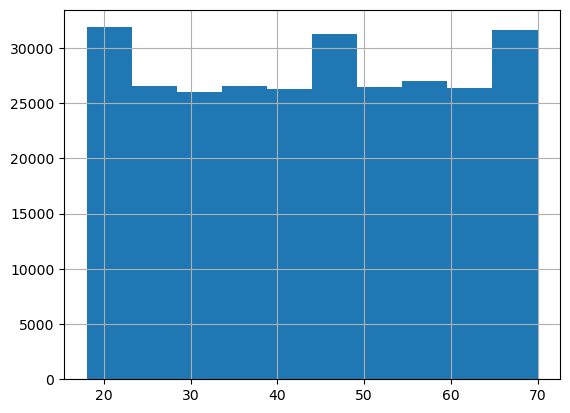

In [22]:
# Vemos Age
credit.Age.hist();

In [23]:
sorted(credit.Age.unique().tolist())[:3], sorted(credit.Age.unique().tolist())[-3:]

([18, 19, 20], [68, 69, 70])

- Esta variable es entera (numérica).
- Se puede decir que tiene una distribución uniforme.
- Va desde los 18 hasta los 70 años.

#### Gender

In [26]:
# Vemos Gender
credit.Gender.value_counts()

Female    133145
Male      132749
Other      13962
Name: Gender, dtype: int64

In [27]:
# Veamos cuánto representa "Other" en el total
credit.Gender[credit.Gender == "Other"].value_counts() / len(credit)

Other    0.04989
Name: Gender, dtype: float64

- Vemos que hombres y mujeres está equilibrado.
- Vemos que otros representa solo el 5% del total.

#### Income

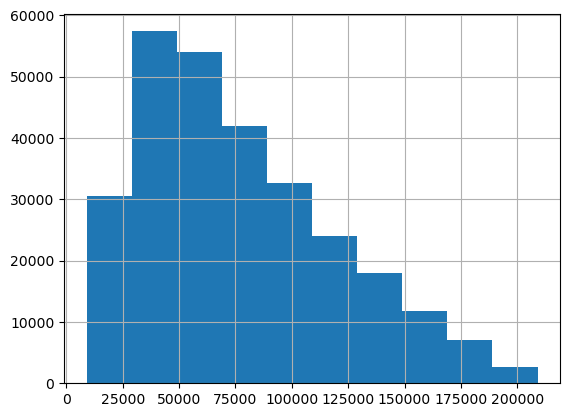

In [30]:
# Vemos cómo están distribuidos los datos
credit.Income.hist();

In [31]:
# Vemos el skewness
credit.Income.skew()

0.7087788559099581

- Tienen una distribución conocida con skewness 0.71 por lo tanto podemos hacer una transformación al momento de utilizar un modelo lineal.

#### Credit score (nuestro Label)

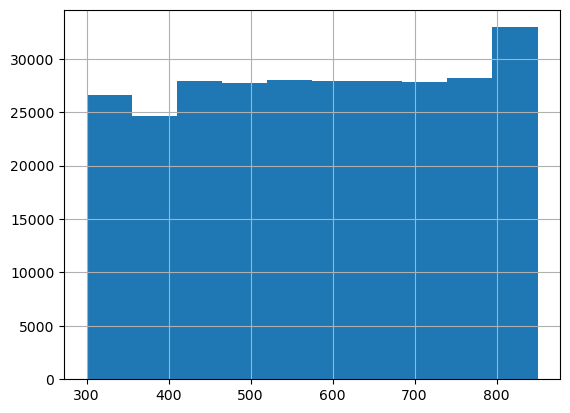

In [34]:
credit['Credit Score'].hist();

- Vemos que también parece una distribución uniforme.

#### Credit history length

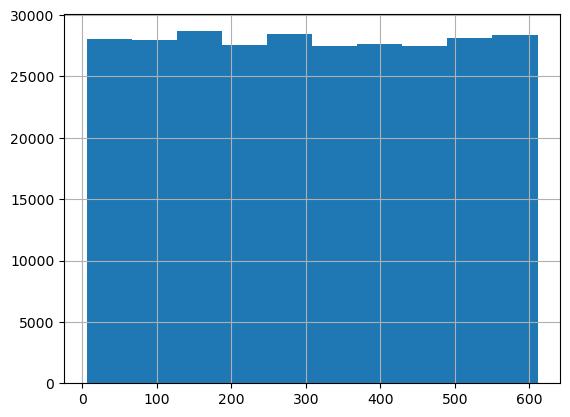

In [37]:
credit['Credit History Length'].hist();

- Vemos que también la distribución de esta variable es uniforme.

#### Number of Existing Loans

In [40]:
credit['Number of Existing Loans'].value_counts()

8     28184
4     28059
2     27968
6     27955
5     27950
7     27792
3     27745
0     26590
1     24656
9     17332
10    15625
Name: Number of Existing Loans, dtype: int64

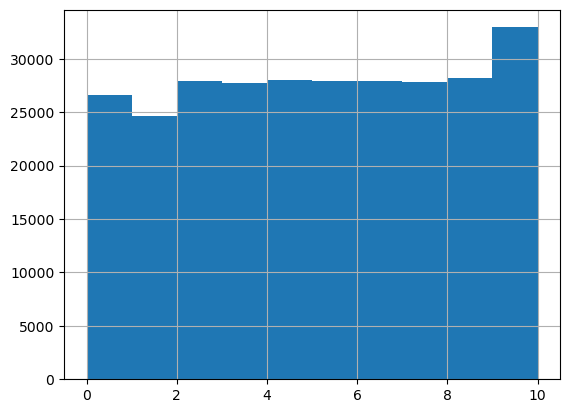

In [41]:
credit['Number of Existing Loans'].hist();

- Vemos que es una variable discreta dividida en 11.
- La distribución es uniforme.
- Podemos considerarla categórica.

#### Loan amount

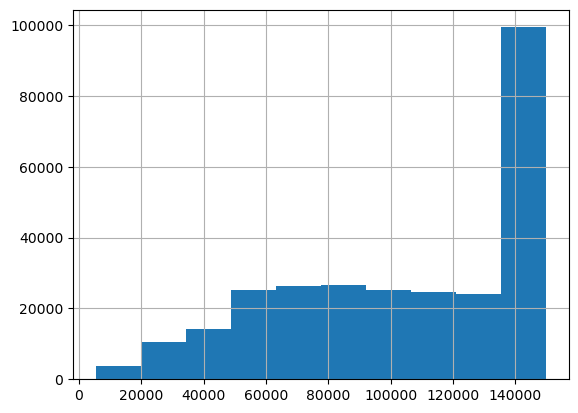

In [44]:
credit['Loan Amount'].hist();

- Uno de los valores es el más frecuente. Lo podemos aislar o podemos realizarle una transformación logarítmica y ver cómo se modifica.

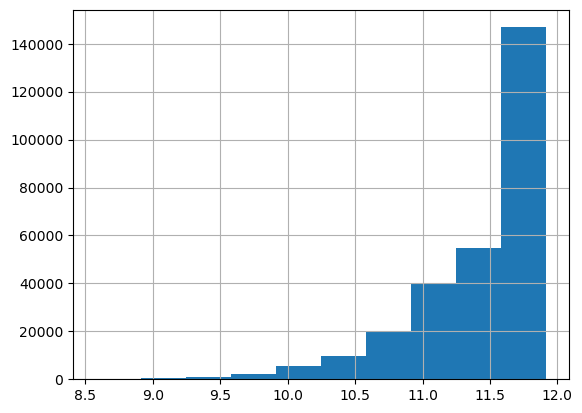

In [46]:
log_loan_amount = np.log(credit['Loan Amount'])
log_loan_amount.hist();

In [47]:
# Calculamos skewness y vemos si se puede normalizar
log_loan_amount.skew()

-1.3901725049556168

- Podríamos aplicar una transformación Yeo-Johnson.

#### Loan tenure

In [50]:
credit['Loan Tenure'].value_counts()

100    1971
96     1952
81     1930
63     1921
73     1906
       ... 
250     354
301     353
324     348
255     343
319     337
Name: Loan Tenure, Length: 348, dtype: int64

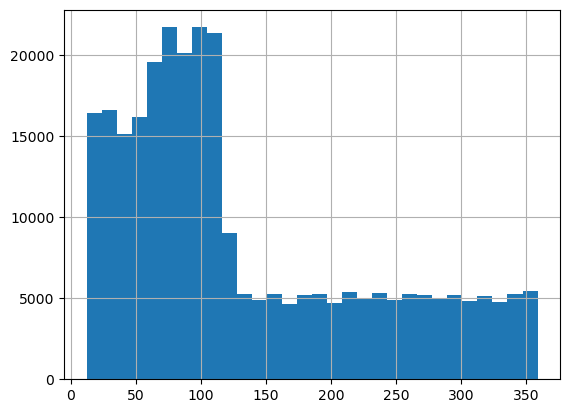

In [51]:
credit['Loan Tenure'].hist(bins=30);

- Vemos que tiene una distribución poco conocida, pero podríamos separar los valores y definirlo como una categoría.

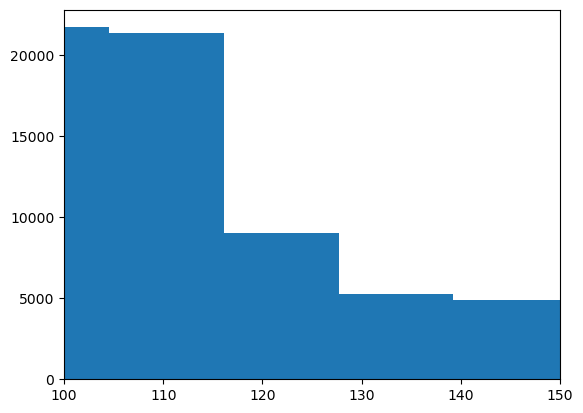

In [53]:
plt.hist(credit['Loan Tenure'], bins=30)
plt.xlim([100,150])
plt.show()

- Vemos que el corte ronda los 115.
- Analizamos si queda equilibrado el feature cortando en ese valor.

In [55]:
# Analizamos el cociente de los que tienen menos a los que tienen mas que 115
credit['Loan Tenure'][credit['Loan Tenure'] < 115].sum() / credit['Loan Tenure'][credit['Loan Tenure'] >= 115].sum()

0.4170804987874216

- Podemos decir que haciendo un corte en este valor quedamos equilibrados.

#### Existing costumer

In [58]:
credit['Existing Customer'].value_counts()

No     173952
Yes    105904
Name: Existing Customer, dtype: int64

In [59]:
credit['Existing Customer'].value_counts()/len(credit)

No     0.621577
Yes    0.378423
Name: Existing Customer, dtype: float64

- Es una variable booleana.
- Está equilibrada ~ 60/40.

#### State

In [62]:
credit.State.value_counts()

Karnataka        28245
Telangana        28101
Maharashtra      28095
Gujarat          28051
West Bengal      28050
Tamil Nadu       28022
Kerala           28011
Delhi            27996
Uttar Pradesh    27713
Rajasthan        27572
Name: State, dtype: int64

- Todas las clases están equilibradas.

#### City

In [65]:
credit.City.value_counts()

Kolkata               23900
New Delhi             23887
Hyderabad             23726
Mysuru                12227
Udaipur               12012
Kanpur                12001
Surat                 11969
Thiruvananthapuram    11966
Coimbatore            11907
Ahmedabad             11896
Chennai               11797
Bengaluru             11777
Kochi                 11748
Lucknow               11682
Jaipur                11482
Dhulagori              8527
Manjari                8483
Bishanpura             8396
Nellikuppam            8341
Channarayapatna        8242
Mumbai                 8093
Nagpur                 7923
Pune                   7874
Name: City, dtype: int64

- Hay tres ciudades que pueden tener un peso elevado.
- Se podría analizar separar en 3 categorías; por ahí puede haber mejor interpretación o score.

#### LTV ratio

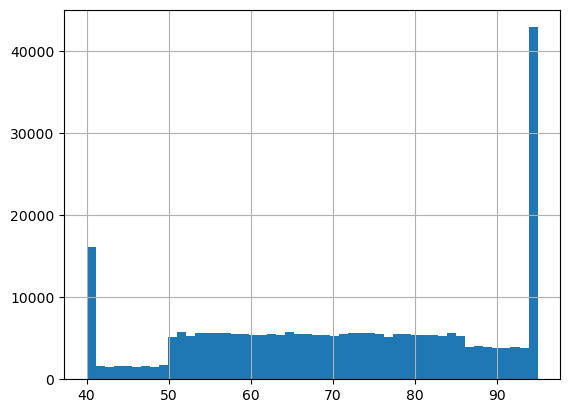

In [68]:
credit['LTV Ratio'].hist(bins=50);

- Tiene una distribución muy extraña. Como si los valores extremos sean límites por exceso y defecto.

#### Employment profile

In [71]:
credit['Employment Profile'].value_counts()

Salaried         136065
Self-Employed     84369
Freelancer        22629
Student           18521
Unemployed        18272
Name: Employment Profile, dtype: int64

In [72]:
# Analizamos en porcentajes como están distribuidos
credit['Employment Profile'].value_counts()/len(credit)

Salaried         0.486196
Self-Employed    0.301473
Freelancer       0.080859
Student          0.066180
Unemployed       0.065291
Name: Employment Profile, dtype: float64

- La gran mayoría es o asalariado y auto-empleado. El resto podría reducirse a una sola categoría.

#### Profile score

In [136]:
credit['Profile Score'].value_counts()

100    58495
90      8362
98      8284
95      8257
94      8176
       ...  
3        194
4        189
5        173
2        137
1        119
Name: Profile Score, Length: 101, dtype: int64

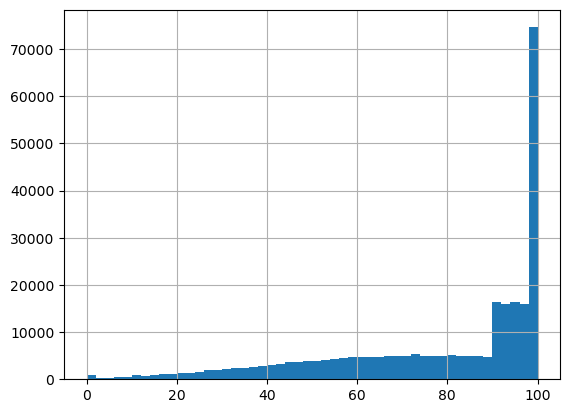

In [140]:
credit['Profile Score'].hist(bins=50);

- Del último histograma se ve que la gran mayoría es mayor a 90.
- Se puede probar agrupando en dos categorías y chequear si estan balanceados.

In [150]:
credit['Profile Score'][credit['Profile Score'] < 90].sum() / credit['Profile Score'][credit['Profile Score'] >= 90].sum()

0.6061210940635955

#### Occupation

In [154]:
credit.Occupation.value_counts()

Banker                    27760
Teacher                   27356
Civil Servant             27221
Software Engineer         27146
Doctor                    26582
Shopkeeper                21405
Contractor                21090
Farmer                    20966
Business Owner            20908
Student                   18521
Other                     18272
Graphic Designer           5723
Photographer               5706
Independent Consultant     5628
Writer                     5572
Name: Occupation, dtype: int64

## Elegimos nuestro X y nuestro y

In [76]:
X = credit.drop('Credit Score', axis=1)
y = credit['Credit Score']

In [77]:
# Chequeamos cómo queda
X.shape, y.shape

((279856, 14), (279856,))

### Realizamos el split
- Podemos tomar validación ya que son muchos rows.
- Tenemos que elegir un seed que nos permita mantener un cierto equilibrio.

## Regresión